In [201]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
from sklearn import datasets
import pandas as pd
import numpy as np
from scipy import stats
import math
from sklearn import datasets

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
from sklearn.tree import export_graphviz

# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import math
from sklearn import datasets

#Seaborn makes creating attractive graphs simpler
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
csv_fpath = os.path.expanduser('~/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')
CarData = pd.read_csv(csv_fpath)
print(CarData.dtypes)
print(CarData.shape)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [10]:
CarData.head(50)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,Unspecified,NaN,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Unspecified,NaN,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,Unspecified,NaN,NaN,NaN,4285412,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,Unspecified,NaN,NaN,NaN,4284387,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4289056,Sedan,Sedan,NaN,NaN,NaN
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4287390,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,Unspecified,NaN,NaN,NaN,4281172,Sedan,4 dr sedan,NaN,NaN,NaN


In [11]:
CarData["BOROUGH"].value_counts()

BROOKLYN         361640
QUEENS           310684
MANHATTAN        276292
BRONX            163233
STATEN ISLAND     49531
Name: BOROUGH, dtype: int64

In [12]:
CarData["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

Unspecified                       606214
Driver Inattention/Distraction    315718
Failure to Yield Right-of-Way      95974
Following Too Closely              85142
Backing Unsafely                   64128
                                   ...  
Shoulders Defective/Improper          72
Windshield Inadequate                 69
Texting                               37
Listening/Using Headphones            18
1                                     10
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 61, dtype: int64

In [13]:
CarData["VEHICLE TYPE CODE 1"].value_counts()

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  184252
Station Wagon/Sport Utility Vehicle    151311
TAXI                                    50670
                                        ...  
Wheel                                       1
Rescu                                       1
LIMOU                                       1
Sweep                                       1
EPO                                         1
Name: VEHICLE TYPE CODE 1, Length: 727, dtype: int64

In [14]:
def borough_to_numeric(x):
    if x=='QUEENS':
        return 1
    if x=='BROOKLYN':
        return 2
    if x=='MANHATTAN':
        return 3
    if x=='BRONX':
        return 4
    if x=='STATEN ISLAND':
        return 5
    else:
        return 0
    
CarData['borough_num'] = CarData['BOROUGH'].apply(borough_to_numeric)
CarData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN,1
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1


In [15]:
def time_to_day_night(x):
    L = x.split(":")
    H = int(L[0])
    M = int(L[1])
    return (H + (M/60))
    
CarData['time_num'] = CarData['CRASH TIME'].apply(time_to_day_night)
CarData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN,0,9.000000
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN,1,19.333333
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN,0,5.733333
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1,0.000000


In [16]:
def injured_to_binary(x):
        if x>= 1:
            return 1
        else:
            return 0
CarData['injuries'] = CarData['NUMBER OF PERSONS INJURED'].apply(injured_to_binary)
CarData.head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN,0,9.000000,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN,1,19.333333,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,4279961,Taxi,NaN,NaN,NaN,NaN,0,5.733333,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1,0.000000,0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,NaN,4285412,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2,21.000000,1
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,NaN,4284387,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,1,8.500000,0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,NaN,4289056,Sedan,Sedan,NaN,NaN,NaN,0,18.600000,0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,NaN,4287390,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,10.666667,0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,NaN,4281172,Sedan,4 dr sedan,NaN,NaN,NaN,2,20.683333,0


In [19]:
def zip_to_int(x):
        if x >= 1:
            return x
        else:
            return 0
CarData['zipcodes'] = CarData['ZIP CODE'].apply(zip_to_int)
CarData.head(20)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [20]:
BronxInjuries = CarData.loc[CarData['borough_num'] == 4,'NUMBER OF PERSONS INJURED'].sum()
print(BronxInjuries)
QueensInjuries = CarData.loc[CarData['borough_num'] == 1,'NUMBER OF PERSONS INJURED'].sum()
print(QueensInjuries)
BrooklynInjuries = CarData.loc[CarData['borough_num'] == 2,'NUMBER OF PERSONS INJURED'].sum()
print(BrooklynInjuries)
ManhattanInjuries = CarData.loc[CarData['borough_num'] == 3,'NUMBER OF PERSONS INJURED'].sum()
print(ManhattanInjuries)
StatenInjuries = CarData.loc[CarData['borough_num'] == 5,'NUMBER OF PERSONS INJURED'].sum()
print(StatenInjuries)

46684.0
81723.0
104966.0
48339.0
12518.0


In [21]:
BronxPop = 1,432,132
QueensPop = 2,278,906
BrooklynPop = 2,582,830
ManhattanPop = 1,628,701
StatenPop = 476,179
NYCPop = 8,398,748

In [22]:
NYCData = {'Borough':  ['Bronx','Queens','Manhattan','Brooklyn','Staten Island'],
        'Population': [1432132, 2278906, 1628701, 2582830, 476179],
         'Injuries': [46684, 81723, 48339, 104966, 12518]
        }

citydata = pd.DataFrame (NYCData, columns = ['Borough','Population','Injuries'])
print(citydata)

         Borough  Population  Injuries
0          Bronx     1432132     46684
1         Queens     2278906     81723
2      Manhattan     1628701     48339
3       Brooklyn     2582830    104966
4  Staten Island      476179     12518


In [23]:
citydata['proportion of injuries per borough'] = citydata['Injuries']/citydata['Population']
print(citydata)

         Borough  Population  Injuries  proportion of injuries per borough
0          Bronx     1432132     46684                            0.032598
1         Queens     2278906     81723                            0.035861
2      Manhattan     1628701     48339                            0.029679
3       Brooklyn     2582830    104966                            0.040640
4  Staten Island      476179     12518                            0.026288


In [24]:
print(CarData.dtypes)
print(CarData.shape)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [25]:
CarData["NUMBER OF PERSONS KILLED"].head(60)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
59    0.0
Name: NUMBER OF PERSONS KILLED, dtype: float64

In [26]:
def injuries_to_integers(x):
    if x > 0:
        return int(x)
    else:
        return 0
    
CarData['injuries_int'] = CarData['NUMBER OF PERSONS INJURED'].apply(injuries_to_integers)
CarData.head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,4276854,Sedan,Sedan,NaN,NaN,NaN,0,9.000000,0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,4289613,AMBUL,AMBUL,NaN,NaN,NaN,1,19.333333,0,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,4279961,Taxi,NaN,NaN,NaN,NaN,0,5.733333,0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000,0,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1,0.000000,0,0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,4285412,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2,21.000000,1,3
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,4284387,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,1,8.500000,0,0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,4289056,Sedan,Sedan,NaN,NaN,NaN,0,18.600000,0,0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,4287390,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,10.666667,0,0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,4281172,Sedan,4 dr sedan,NaN,NaN,NaN,2,20.683333,0,0


In [27]:
def deaths_to_integers(x):
    if x > 0:
        return x
    else:
        return 0
    
CarData['killed_int'] = CarData['NUMBER OF PERSONS KILLED'].apply(deaths_to_integers)
CarData.head(100)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int,killed_int
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Sedan,Sedan,NaN,NaN,NaN,0,9.000000,0,0,0.0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,AMBUL,AMBUL,NaN,NaN,NaN,1,19.333333,0,0,0.0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,Taxi,NaN,NaN,NaN,NaN,0,5.733333,0,0,0.0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000,0,0,0.0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1,0.000000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,02/06/2020,17:35,MANHATTAN,10001,40.752150,-73.991295,POINT (-73.991295 40.75215),NaN,NaN,237 WEST 35 STREET,...,Sedan,Sedan,NaN,NaN,NaN,3,17.583333,0,0,0.0
96,02/08/2020,10:20,MANHATTAN,10065,40.761173,-73.957890,POINT (-73.95789 40.761173),YORK AVENUE,EAST 63 STREET,NaN,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,3,10.333333,0,0,0.0
97,01/23/2020,18:30,QUEENS,11368,40.754290,-73.856445,POINT (-73.856445 40.75429),NaN,NaN,111-23 37 AVENUE,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1,18.500000,0,0,0.0
98,01/18/2020,13:45,QUEENS,11372,40.752373,-73.879110,POINT (-73.87911 40.752373),35 AVENUE,88 STREET,NaN,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1,13.750000,0,0,0.0


Data:

In [29]:
CarData.head(50)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int,killed_int
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Sedan,Sedan,NaN,NaN,NaN,0,9.000000,0,0,0.0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,AMBUL,AMBUL,NaN,NaN,NaN,1,19.333333,0,0,0.0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,Taxi,NaN,NaN,NaN,NaN,0,5.733333,0,0,0.0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000,0,0,0.0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1,0.000000,0,0,0.0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2,21.000000,1,3,0.0
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,1,8.500000,0,0,0.0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,Sedan,Sedan,NaN,NaN,NaN,0,18.600000,0,0,0.0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,10.666667,0,0,0.0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,Sedan,4 dr sedan,NaN,NaN,NaN,2,20.683333,0,0,0.0


In [30]:
citydata

,Borough,Population,Injuries,proportion of injuries per borough
0,Bronx,1432132,46684,0.032598
1,Queens,2278906,81723,0.035861
2,Manhattan,1628701,48339,0.029679
3,Brooklyn,2582830,104966,0.040640
4,Staten Island,476179,12518,0.026288


Visualizations

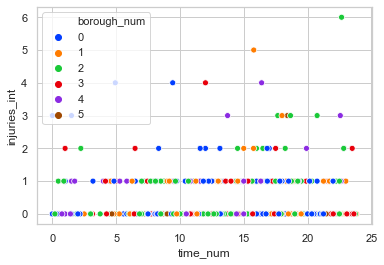

In [81]:
CarData_sample = CarData.sample(1000)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=6))
plt.show()

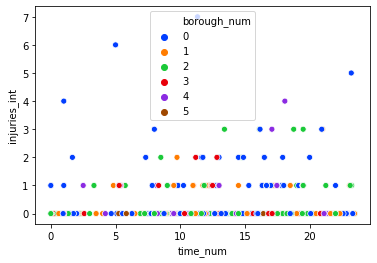

In [66]:
CarData_sample = CarData.sample(500)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=6))
plt.show()

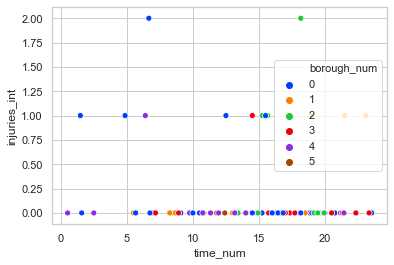

In [79]:
CarData_sample = CarData.sample(100)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=6))
plt.show()

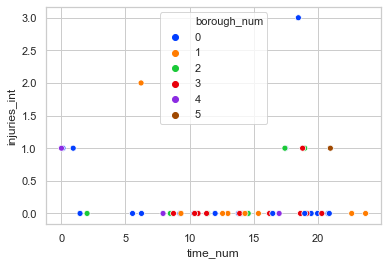

In [80]:
CarData_sample = CarData.sample(50)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=6))
plt.show()

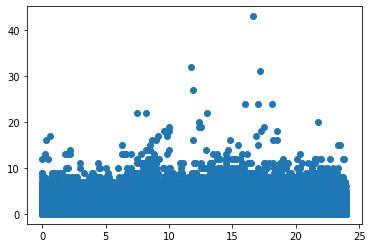

In [59]:
timevinjuries = plt.scatter(CarData['time_num'],CarData['injuries_int'])
plt.show()

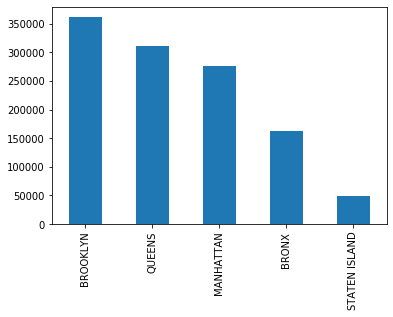

In [32]:
ax_1g = CarData['BOROUGH'].value_counts().plot(kind = 'bar')
plt.show()

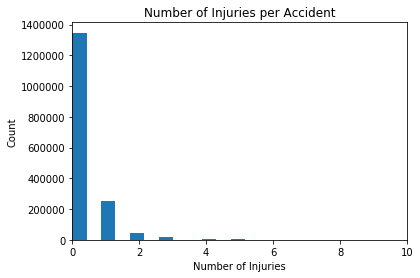

In [53]:
InjuriesDistribution = plt.hist(CarData['injuries_int'], bins=100) 
plt.xlim(0,10)
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.title('Number of Injuries per Accident')
plt.show()

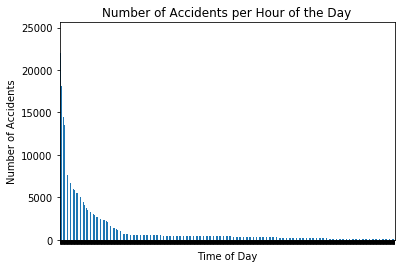

In [36]:
InjuryTimes = CarData['time_num'].value_counts().plot(kind = 'bar')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Hour of the Day')
InjuryTimes.axes.xaxis.set_ticklabels([])
plt.show()

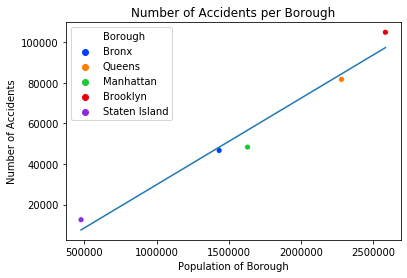

In [57]:
sns.scatterplot(x=citydata["Population"], y=citydata["Injuries"],
                    hue=citydata.loc[:,'Borough'], palette=sns.color_palette("bright",n_colors=5))
plt.xlabel('Population of Borough')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Borough')
x=citydata["Population"]
y=citydata["Injuries"]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [104]:
CarDataKnown = CarData[['LATITUDE','injuries_int','killed_int','time_int','time_num']].copy()
CarDataKnown.head(60)
#new = old[['A', 'C', 'D']].copy()

,LATITUDE,injuries_int,killed_int,time_int,time_num
0,40.715820,0,0.0,9.0,9.000000
1,40.744590,0,0.0,19.0,19.333333
2,40.755950,0,0.0,6.0,5.733333
3,40.703762,0,0.0,9.0,9.000000
4,40.716946,0,0.0,0.0,0.000000
5,40.636536,3,0.0,21.0,21.000000
6,40.774540,0,0.0,8.0,8.500000
7,NaN,0,0.0,19.0,18.600000
8,40.840180,0,0.0,11.0,10.666667
9,40.688457,0,0.0,21.0,20.683333


In [86]:
CarData['time_int'] = CarData['time_num'].round()
CarData.head(7)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int,killed_int,inj_bin,killed_bin,time_int
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,0,9.000000,0,0,0.0,0,0,9.0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,1,19.333333,0,0,0.0,0,0,19.0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,0,5.733333,0,0,0.0,0,0,6.0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,2,9.000000,0,0,0.0,0,0,9.0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,1,0.000000,0,0,0.0,0,0,0.0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,NaN,NaN,2,21.000000,1,3,0.0,1,0,21.0
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,NaN,NaN,1,8.500000,0,0,0.0,0,0,8.0


In [ ]:
X_feat = CarData[['injuries_int','killed_int']]
y = CarData['time_int']
t = DecisionTreeClassifier(max_depth=2,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  

Text(0, 0.5, 'killed_int')

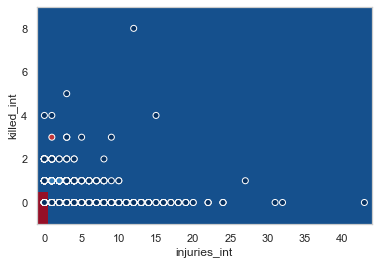

In [94]:
x_min, x_max = CarData['injuries_int'].min()-1, CarData['injuries_int'].max()+1
y_min, y_max = CarData['killed_int'].min()-1, CarData['killed_int'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),np.arange(y_min, y_max, .01))
Z = t.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu')
plt.scatter(x=CarData['injuries_int'],y=CarData['killed_int'],c=CarData['time_int'],cmap='RdBu',vmin=-.2, vmax=1.2,edgecolors='white')
plt.xlabel('injuries_int')
plt.ylabel('killed_int')

In [100]:
X_feat = CarData[['injuries_int','killed_int']]
y = CarData['LATITUDE']
t = DecisionTreeClassifier(max_depth=5,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
x_min, x_max = CarData['injuries_int'].min()-1, CarData['injuries_int'].max()+1
y_min, y_max = CarData['killed_int'].min()-1, CarData['killed_int'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),np.arange(y_min, y_max, .01))
Z = t.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu')
plt.scatter(x=CarData['injuries_int'],y=CarData['killed_int'],c=CarData['LATITUDE'],cmap='RdBu',vmin=-.2, vmax=1.2,edgecolors='white')
plt.xlabel('injuries_int')
plt.ylabel('killed_int')

In [44]:
feature_col = "borough_num"
resp_col = "injuries_int"

X = CarData[feature_col].copy()
y = CarData[resp_col].copy()

X=X>0
y=y>0
X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.20053884]
[('b', array([-0.010031]))]
R^2:  0.00013659420272349454
MSE:  0.15607657203182343


In [45]:
feature_col = "injuries_int"
resp_col = "killed_int"

X = CarData[feature_col].copy()
y = CarData[resp_col].copy()

X=X>0
y=y>0
X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.00105846]
[('i', array([0.00036714]))]
R^2:  1.8648714748104034e-05
MSE:  0.0011282252683533836


In [46]:
def killed_to_binary(x):
    if x >= 1:
        return 1
    else:
        return 0
CarData['killed_bin'] = CarData['NUMBER OF PERSONS KILLED'].apply(killed_to_binary)
CarData.head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int,killed_int,inj_bin,killed_bin
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,0,9.000000,0,0,0.0,0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,NaN,1,19.333333,0,0,0.0,0,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,NaN,0,5.733333,0,0,0.0,0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,NaN,2,9.000000,0,0,0.0,0,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,NaN,1,0.000000,0,0,0.0,0,0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,NaN,NaN,NaN,2,21.000000,1,3,0.0,1,0
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,NaN,NaN,NaN,1,8.500000,0,0,0.0,0,0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,NaN,NaN,NaN,0,18.600000,0,0,0.0,0,0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,NaN,NaN,NaN,0,10.666667,0,0,0.0,0,0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,NaN,NaN,NaN,2,20.683333,0,0,0.0,0,0


In [47]:
def inj_to_binary(x):
    if x >= 1:
        return 1
    else:
        return 0
CarData['inj_bin'] = CarData['NUMBER OF PERSONS INJURED'].apply(inj_to_binary)
CarData.head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int,killed_int,inj_bin,killed_bin
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,0,9.000000,0,0,0.0,0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,NaN,1,19.333333,0,0,0.0,0,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,NaN,0,5.733333,0,0,0.0,0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,NaN,2,9.000000,0,0,0.0,0,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,NaN,1,0.000000,0,0,0.0,0,0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,NaN,NaN,NaN,2,21.000000,1,3,0.0,1,0
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,NaN,NaN,NaN,1,8.500000,0,0,0.0,0,0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,NaN,NaN,NaN,0,18.600000,0,0,0.0,0,0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,NaN,NaN,NaN,0,10.666667,0,0,0.0,0,0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,NaN,NaN,NaN,2,20.683333,0,0,0.0,0,0


In [48]:
X = CarData["borough_num"].dropna()
Y = CarData["killed_bin"].dropna()
pred = np.array(X)
resp = np.array(Y)
pred = X.values.reshape(-1,1)
resp = Y.values.reshape(-1,1)

X = pred
Y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,Y)
print("Accuracy without splitting data:",metrics.accuracy_score(Y,logreg_all.predict(X)))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without splitting data: 0.9988704778710633


In [49]:
X = CarData["borough_num"].dropna()
Y = CarData["inj_bin"].dropna()
pred = np.array(X)
resp = np.array(Y)
pred = X.values.reshape(-1,1)
resp = Y.values.reshape(-1,1)

X = pred
Y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,Y)
print("Accuracy without splitting data:",metrics.accuracy_score(Y,logreg_all.predict(X)))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without splitting data: 0.8064345050753673


**KNOWN DATA**

In [158]:
CarDataKnown = CarData[["BOROUGH",'borough_num','LATITUDE','injuries_int','killed_int','time_int','time_num','inj_bin','killed_bin']].dropna().copy()
CarDataKnown.head(10)

,BOROUGH,borough_num,LATITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin
1,QUEENS,1,40.744590,0,0.0,19.0,19.333333,0,0
3,BROOKLYN,2,40.703762,0,0.0,9.0,9.000000,0,0
4,QUEENS,1,40.716946,0,0.0,0.0,0.000000,0,0
5,BROOKLYN,2,40.636536,3,0.0,21.0,21.000000,1,0
6,QUEENS,1,40.774540,0,0.0,8.0,8.500000,0,0
9,BROOKLYN,2,40.688457,0,0.0,21.0,20.683333,0,0
13,BRONX,4,40.892475,1,0.0,11.0,11.416667,1,0
14,BRONX,4,40.852337,0,0.0,14.0,14.000000,0,0
15,MANHATTAN,3,40.760600,0,0.0,17.0,16.600000,0,0
16,MANHATTAN,3,40.719970,0,0.0,12.0,11.750000,0,0


In [159]:
print(CarDataKnown.dtypes)
print(CarDataKnown.shape)
print(CarDataKnown['injuries_int'].shape)
print(CarDataKnown['time_num'].shape)
print(CarDataKnown['inj_bin'].shape)

BOROUGH          object
borough_num       int64
LATITUDE        float64
injuries_int      int64
killed_int      float64
time_int        float64
time_num        float64
inj_bin           int64
killed_bin        int64
dtype: object
(1131475, 9)
(1131475,)
(1131475,)
(1131475,)


In [160]:
CarDataKnown.sort_values(by='killed_int',ascending=False,inplace=True)
CarDataKnown.head()

,BOROUGH,borough_num,LATITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin
457534,MANHATTAN,3,40.729046,12,8.0,15.0,15.133333,1,1
1664328,QUEENS,1,40.697204,3,5.0,3.0,3.333333,1,1
1214417,QUEENS,1,40.779280,1,4.0,23.0,22.583333,1,1
499810,QUEENS,1,40.762978,15,4.0,6.0,6.283333,1,1
1587859,BROOKLYN,2,40.703159,1,3.0,0.0,0.083333,1,1


In [161]:
BronxInjuries = CarDataKnown.loc[CarData['borough_num'] == 4,'injuries_int'].sum()
print(BronxInjuries)
QueensInjuries = CarDataKnown.loc[CarData['borough_num'] == 1,'injuries_int'].sum()
print(QueensInjuries)
BrooklynInjuries = CarDataKnown.loc[CarData['borough_num'] == 2,'injuries_int'].sum()
print(BrooklynInjuries)
ManhattanInjuries = CarDataKnown.loc[CarData['borough_num'] == 3,'injuries_int'].sum()
print(ManhattanInjuries)
StatenInjuries = CarDataKnown.loc[CarData['borough_num'] == 5,'injuries_int'].sum()
print(StatenInjuries)

45165
79813
102527
46879
12223


In [162]:
NYCDataKnown = {'Borough':  ['Bronx','Queens','Manhattan','Brooklyn','Staten Island'],
        'Population': [1432132, 2278906, 1628701, 2582830, 476179],
         'Injuries': [45165, 79813, 46879, 102527, 12223]
        }

citydataknown = pd.DataFrame (NYCDataKnown, columns = ['Borough','Population','Injuries'])
print(citydata)

         Borough  Population  Injuries  proportion of injuries per borough
0          Bronx     1432132     46684                            0.032598
1         Queens     2278906     81723                            0.035861
2      Manhattan     1628701     48339                            0.029679
3       Brooklyn     2582830    104966                            0.040640
4  Staten Island      476179     12518                            0.026288


In [163]:
X_feat = CarDataKnown[['injuries_int','killed_int']]
y = CarDataKnown['time_int']
t = DecisionTreeClassifier(max_depth=2,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  

In [119]:
x_min, x_max = CarDataKnown['injuries_int'].min()-1, CarDataKnown['injuries_int'].max()+1
y_min, y_max = CarDataKnown['killed_int'].min()-1, CarDataKnown['killed_int'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),np.arange(y_min, y_max, .01))
Z = t.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu')
plt.scatter(x=CarDataKnown['injuries_int'],y=CarDataKnown['killed_int'],c=CarDataKnown['time_int'],cmap='RdBu',vmin=-.2, vmax=1.2,edgecolors='white')
plt.xlabel('injuries_int')
plt.ylabel('killed_int')

Text(0, 0.5, 'killed_int')

Error in callback <function flush_figures at 0x1a1dc003b0> (for post_execute):


KeyboardInterrupt: 

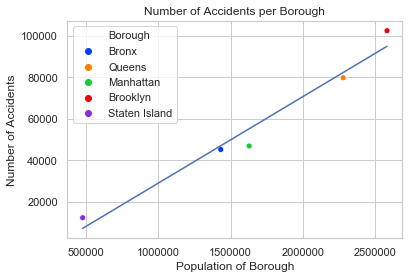

In [164]:
sns.scatterplot(x=citydataknown["Population"], y=citydataknown["Injuries"],
                    hue=citydataknown.loc[:,'Borough'], palette=sns.color_palette("bright",n_colors=5))
plt.xlabel('Population of Borough')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Borough')
x=citydataknown["Population"]
y=citydataknown["Injuries"]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

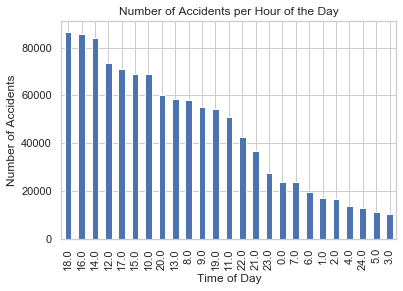

In [165]:
InjuryTimes = CarDataKnown['time_int'].value_counts().plot(kind = 'bar')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Hour of the Day')
plt.show()

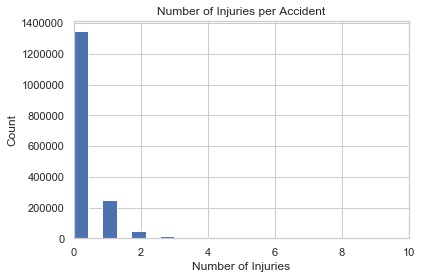

In [166]:
InjuriesDistribution = plt.hist(CarData['injuries_int'], bins=100) 
plt.xlim(0,10)
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.title('Number of Injuries per Accident')
plt.show()

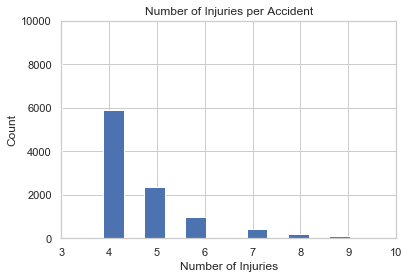

In [167]:
InjuriesDistribution = plt.hist(CarData['injuries_int'], bins=100) 
plt.xlim(3,10)
plt.ylim(0,10000)
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.title('Number of Injuries per Accident')
plt.show()

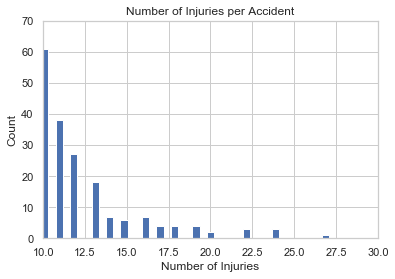

In [168]:
InjuriesDistribution = plt.hist(CarData['injuries_int'], bins=100) 
plt.xlim(10,30)
plt.ylim(0,70)
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.title('Number of Injuries per Accident')
plt.show()

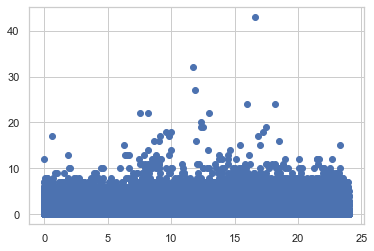

In [169]:
timevinjuries = plt.scatter(CarDataKnown['time_num'],CarDataKnown['injuries_int'])
plt.show()

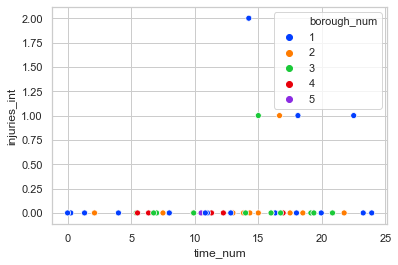

In [171]:
CarData_sample = CarDataKnown.sample(50)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=5))
plt.show()

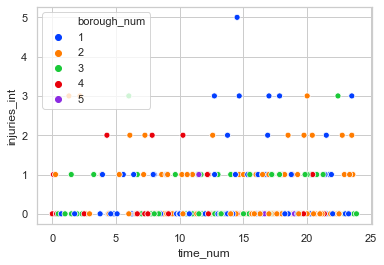

In [172]:
CarData_sample = CarDataKnown.sample(500)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=5))
plt.show()

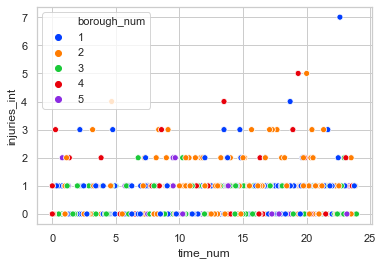

In [173]:
CarData_sample = CarDataKnown.sample(2000)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=5))
plt.show()

Text(0.5, 1.0, 'Histogram of Injuries grouped by Borough')

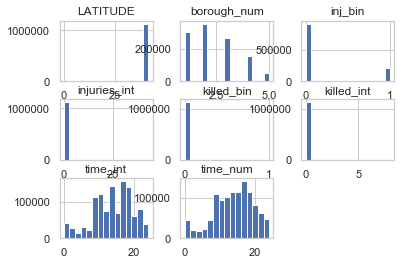

In [203]:
car_group = CarDataKnown['injuries_int'].groupby(CarDataKnown['borough_num'])
stackedHistogram = CarDataKnown.hist(bins=15)
sns.mpl.pyplot.xlabel("Count")
sns.mpl.pyplot.ylabel("Injury Numbers")
sns.mpl.pyplot.legend(stackedHistogram)
sns.mpl.pyplot.title("Histogram of Injuries grouped by Borough")

In [183]:
feature_col = "borough_num"
resp_col = "injuries_int"

X = CarData[feature_col].copy()
y = CarData[resp_col].copy()

X=X>0
y=y>0
X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.20053884]
[('b', array([-0.010031]))]
R^2:  0.00013659420272349454
MSE:  0.15607657203182343


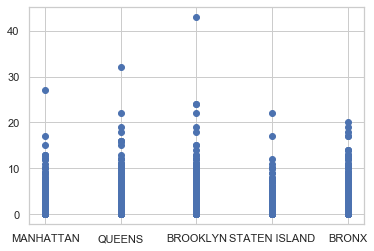

In [187]:
boroughvinjuries = plt.scatter(CarDataKnown['BOROUGH'],CarDataKnown['injuries_int'])
plt.show()

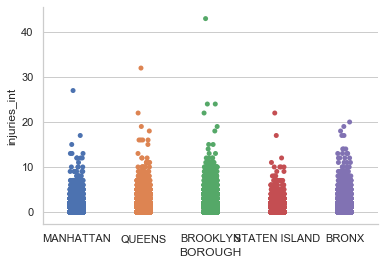

In [190]:
boroughjitter = sns.stripplot(x=CarDataKnown['BOROUGH'], y=CarDataKnown['injuries_int'], data=CarDataKnown, jitter=True)
sns.despine()

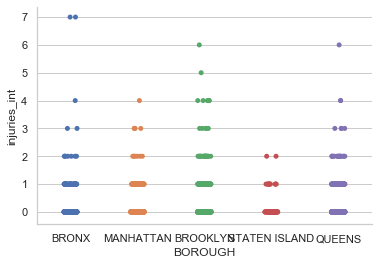

In [193]:
CarData_samplej = CarDataKnown.sample(2000)
boroughjitter = sns.stripplot(x=CarData_samplej['BOROUGH'], y=CarData_samplej['injuries_int'], data=CarDataKnown, jitter=True)
sns.despine()

In [184]:
feature_col = "injuries_int"
resp_col = "killed_int"

X = CarData[feature_col].copy()
y = CarData[resp_col].copy()

X=X>0
y=y>0
X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.00105846]
[('i', array([0.00036714]))]
R^2:  1.8648714748104034e-05
MSE:  0.0011282252683533836


In [185]:
X = CarData["borough_num"].dropna()
Y = CarData["killed_bin"].dropna()
pred = np.array(X)
resp = np.array(Y)
pred = X.values.reshape(-1,1)
resp = Y.values.reshape(-1,1)

X = pred
Y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,Y)
print("Accuracy without splitting data:",metrics.accuracy_score(Y,logreg_all.predict(X)))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without splitting data: 0.9988704778710633


In [186]:
X = CarData["borough_num"].dropna()
Y = CarData["inj_bin"].dropna()
pred = np.array(X)
resp = np.array(Y)
pred = X.values.reshape(-1,1)
resp = Y.values.reshape(-1,1)

X = pred
Y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,Y)
print("Accuracy without splitting data:",metrics.accuracy_score(Y,logreg_all.predict(X)))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without splitting data: 0.8064345050753673


/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


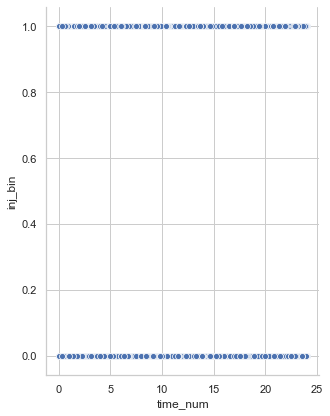

In [195]:
graphlog = sns.pairplot(CarDataKnown,x_vars="time_num",y_vars="inj_bin", size=6, aspect=0.8)


In [196]:
X = CarData["time_num"].dropna()
Y = CarData["inj_bin"].dropna()
pred = np.array(X)
resp = np.array(Y)
pred = X.values.reshape(-1,1)
resp = Y.values.reshape(-1,1)

X = pred
Y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,Y)
print("Accuracy without splitting data:",metrics.accuracy_score(Y,logreg_all.predict(X)))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without splitting data: 0.8064345050753673
